In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import f_oneway

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

In [5]:
df=pd.read_csv('/mnt/All/Downloads/ParisHousing.csv')

In [6]:
display(df.head())
df.shape

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

(10000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

/tmp/ipykernel_93075/1739724788.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

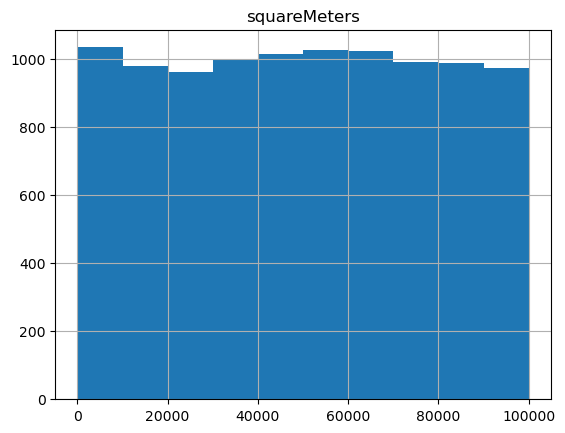

<Figure size 640x480 with 0 Axes>

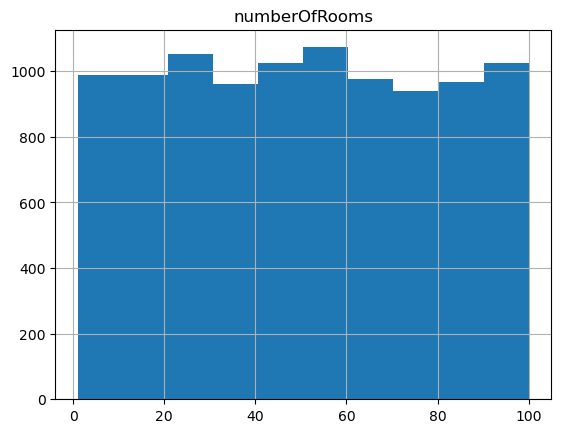

<Figure size 640x480 with 0 Axes>

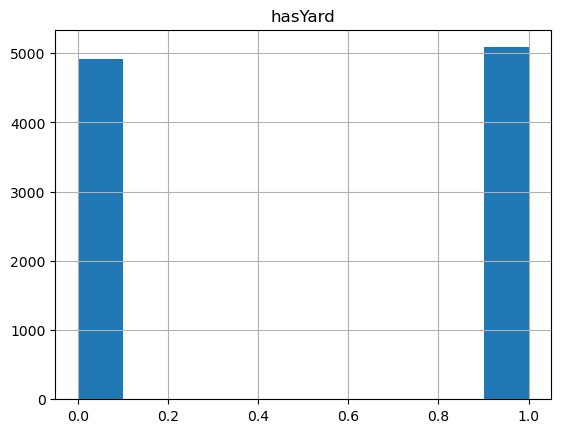

<Figure size 640x480 with 0 Axes>

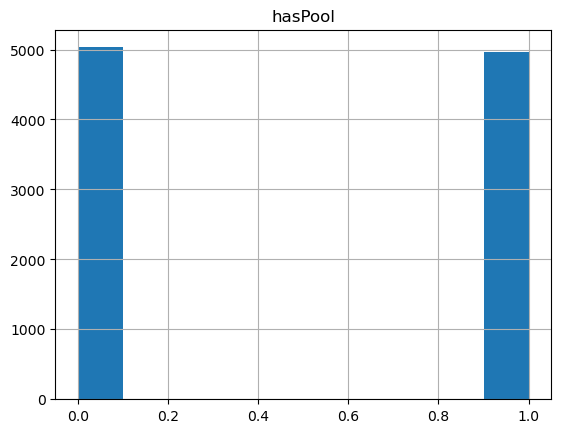

<Figure size 640x480 with 0 Axes>

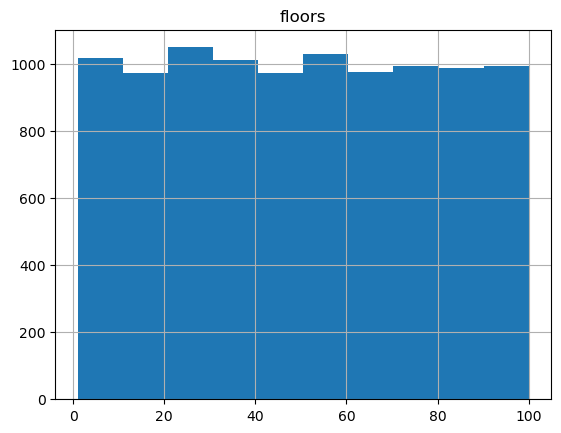

<Figure size 640x480 with 0 Axes>

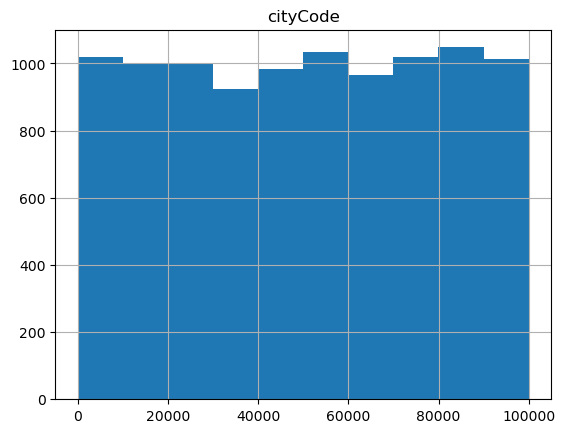

<Figure size 640x480 with 0 Axes>

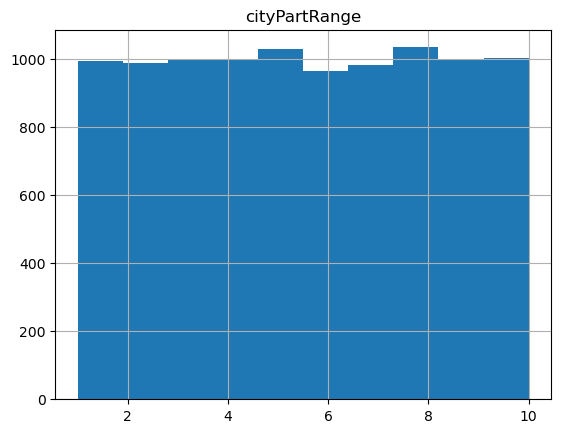

<Figure size 640x480 with 0 Axes>

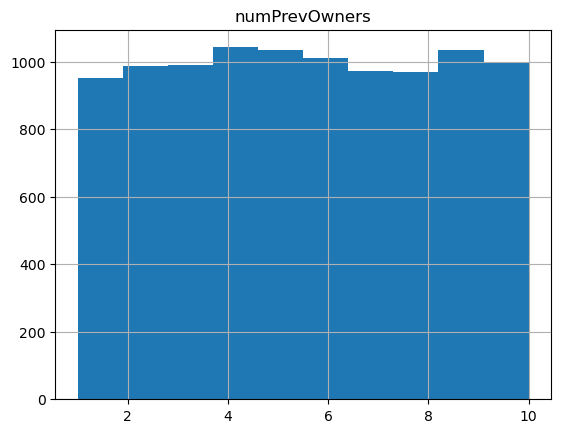

<Figure size 640x480 with 0 Axes>

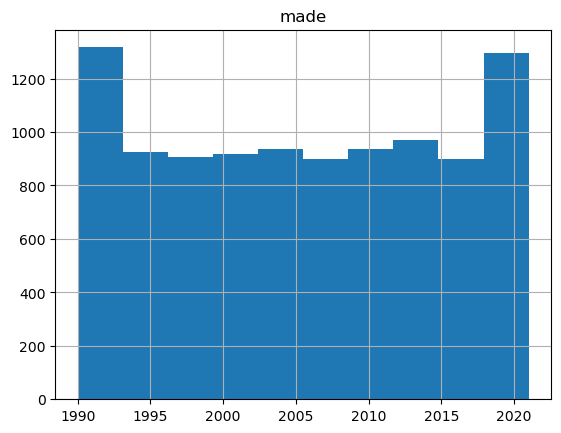

<Figure size 640x480 with 0 Axes>

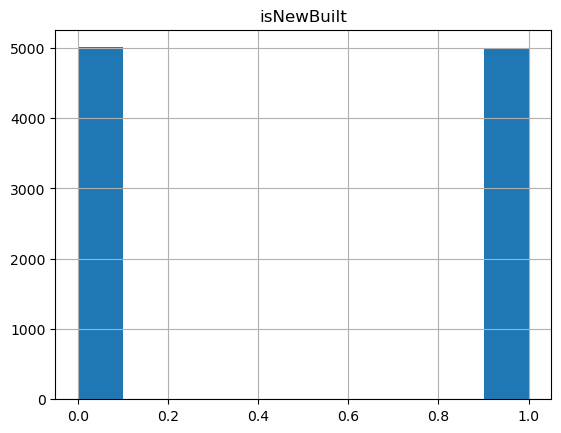

<Figure size 640x480 with 0 Axes>

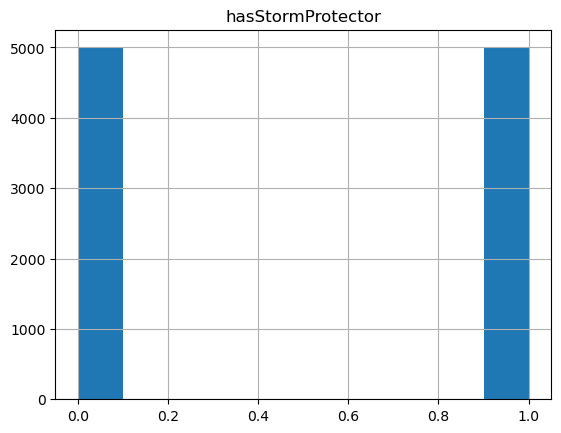

<Figure size 640x480 with 0 Axes>

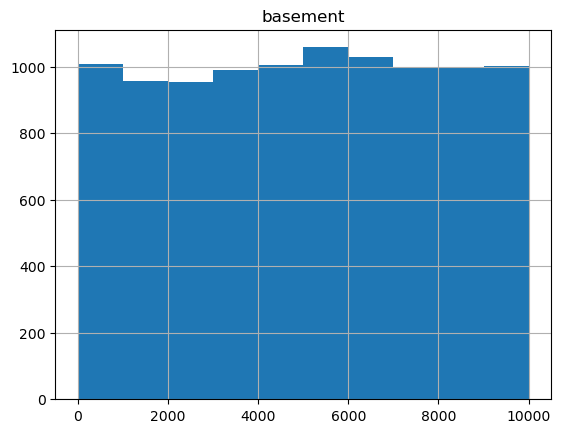

<Figure size 640x480 with 0 Axes>

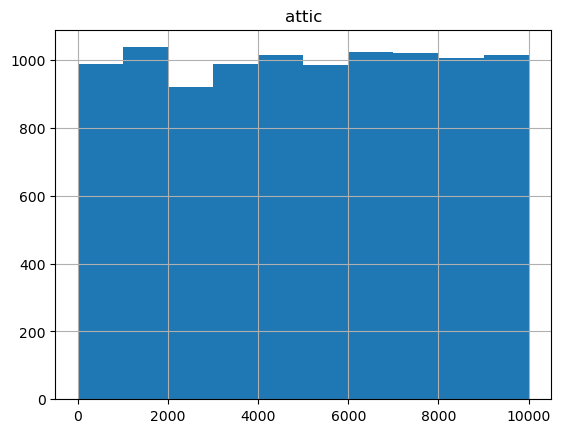

<Figure size 640x480 with 0 Axes>

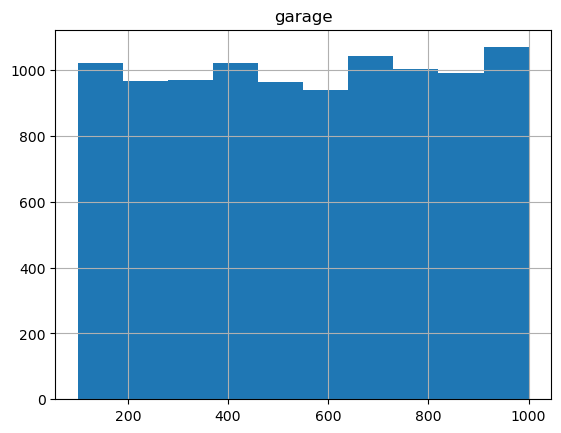

<Figure size 640x480 with 0 Axes>

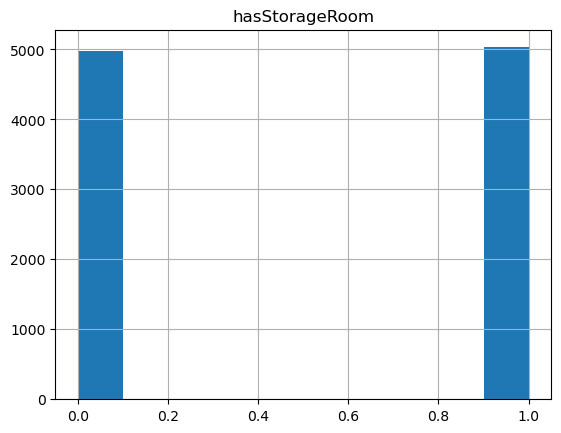

<Figure size 640x480 with 0 Axes>

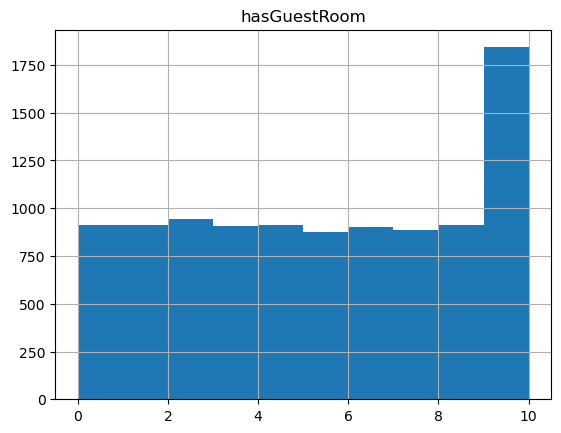

<Figure size 640x480 with 0 Axes>

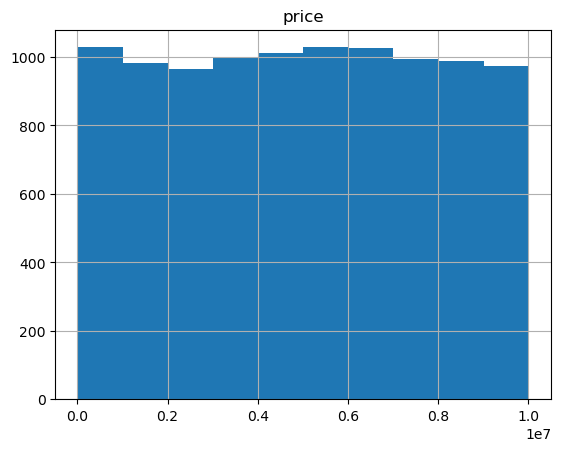

In [8]:
for column in df:
    plt.figure()
    df.hist(column=[column])

In [9]:
z=np.abs(stats.zscore(df))
df[df.columns]=df[(z<3).all(axis=1)]
df=df.dropna()

/tmp/ipykernel_93075/1739724788.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

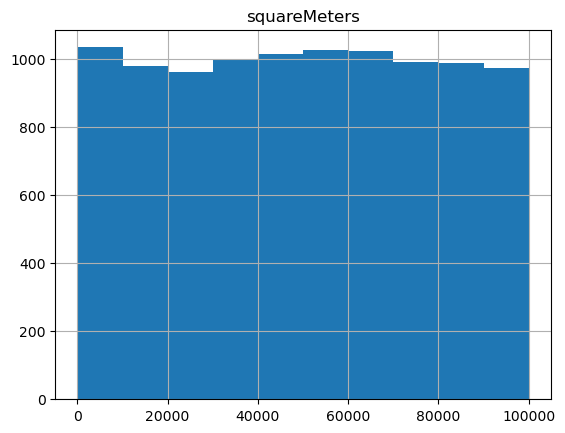

<Figure size 640x480 with 0 Axes>

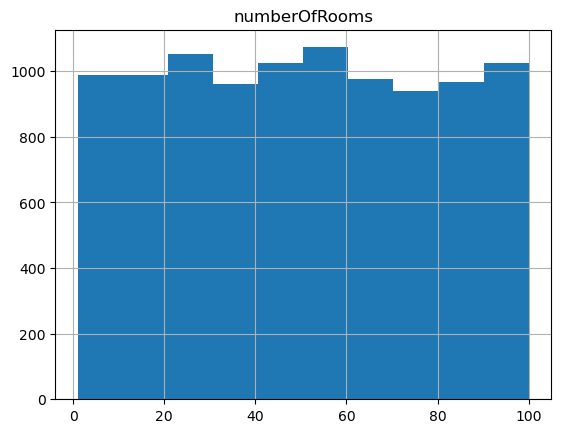

<Figure size 640x480 with 0 Axes>

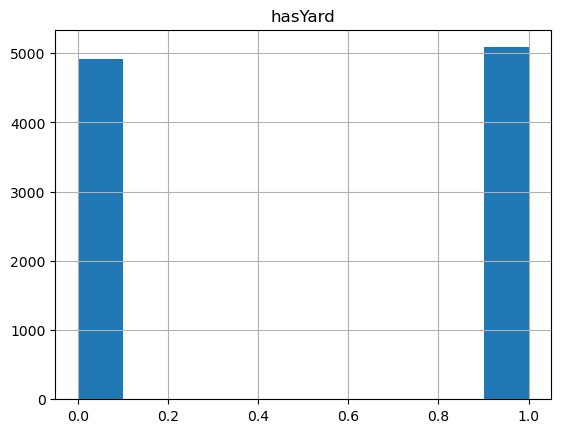

<Figure size 640x480 with 0 Axes>

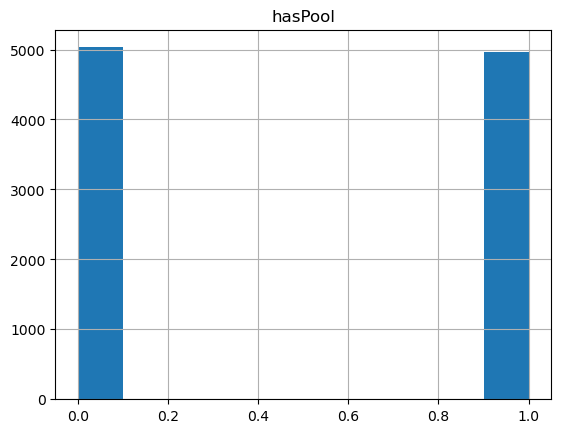

<Figure size 640x480 with 0 Axes>

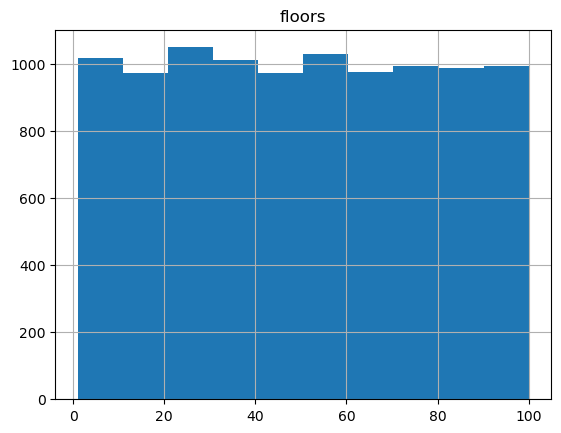

<Figure size 640x480 with 0 Axes>

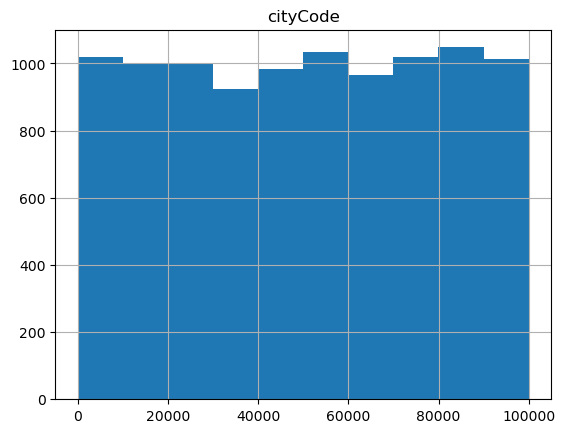

<Figure size 640x480 with 0 Axes>

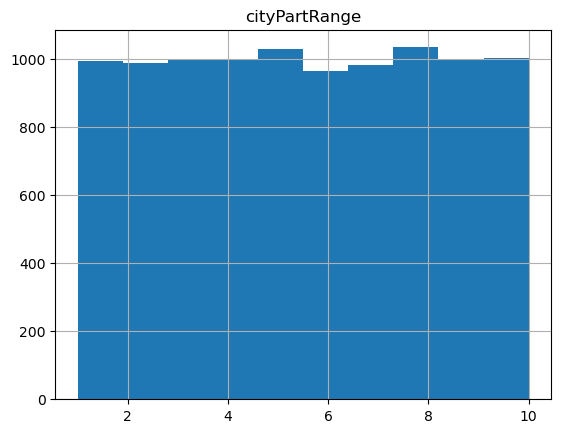

<Figure size 640x480 with 0 Axes>

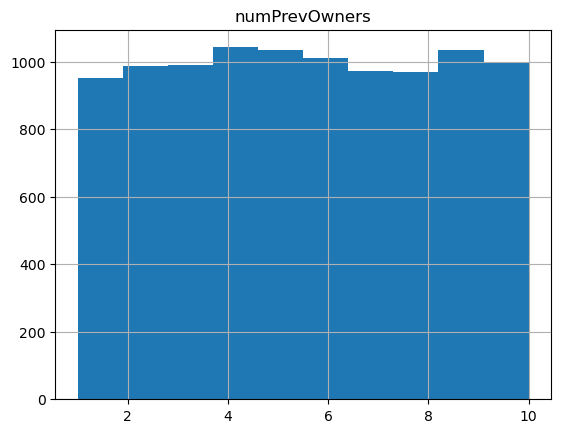

<Figure size 640x480 with 0 Axes>

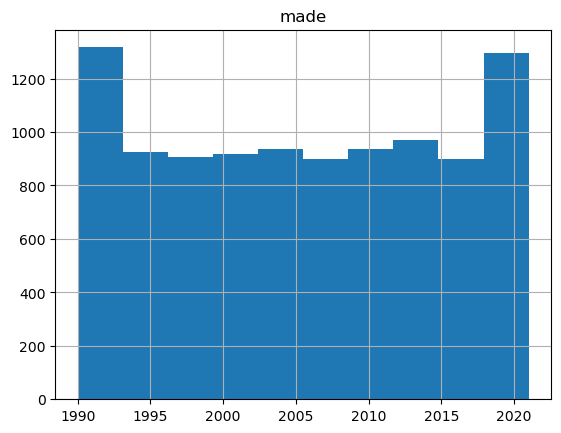

<Figure size 640x480 with 0 Axes>

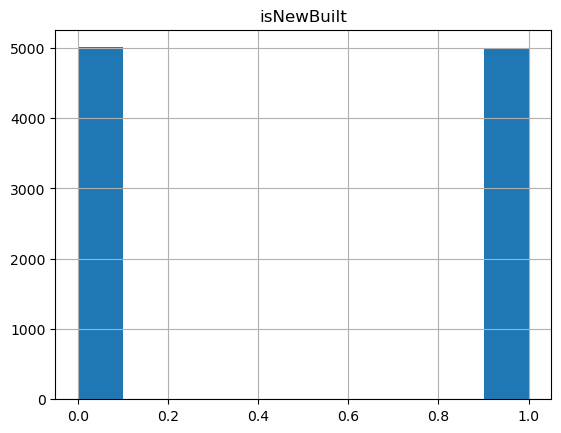

<Figure size 640x480 with 0 Axes>

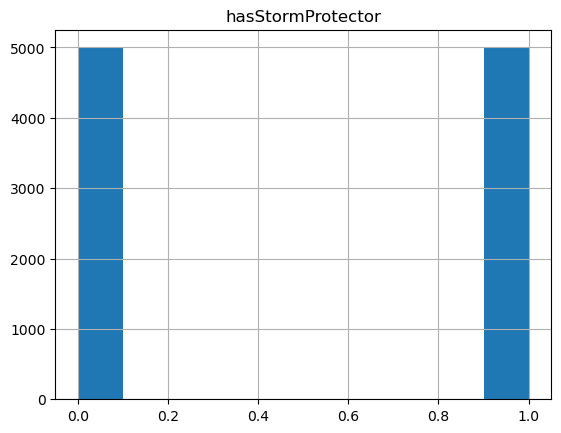

<Figure size 640x480 with 0 Axes>

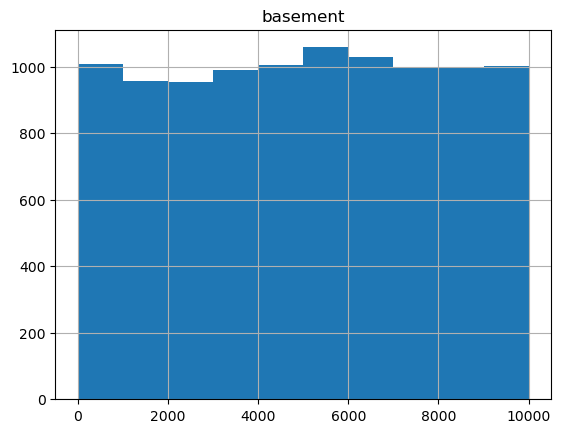

<Figure size 640x480 with 0 Axes>

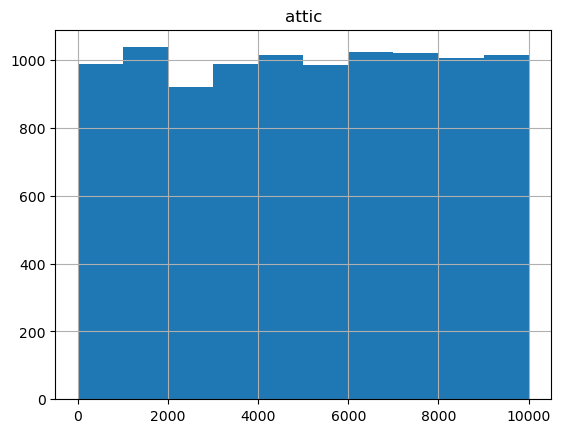

<Figure size 640x480 with 0 Axes>

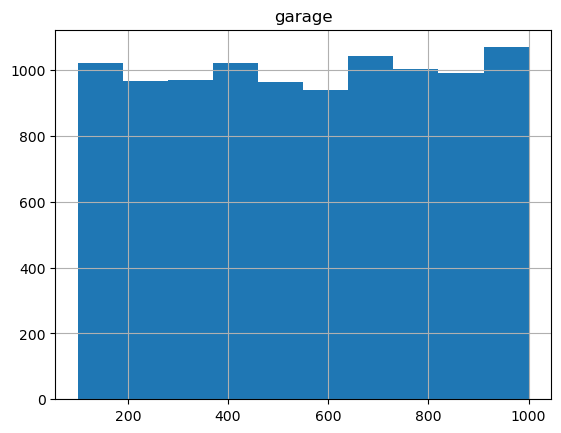

<Figure size 640x480 with 0 Axes>

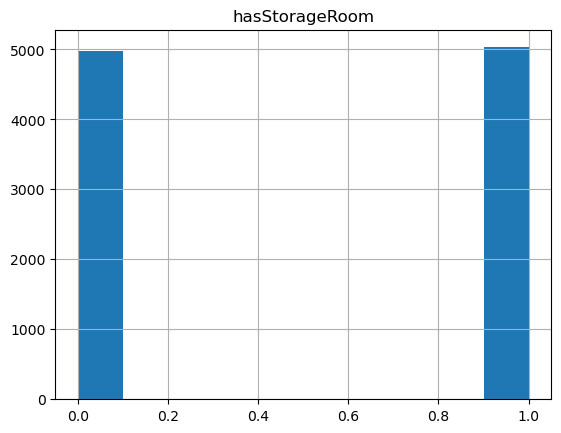

<Figure size 640x480 with 0 Axes>

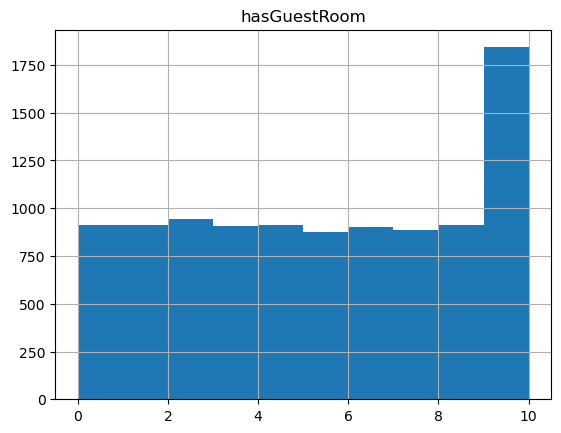

<Figure size 640x480 with 0 Axes>

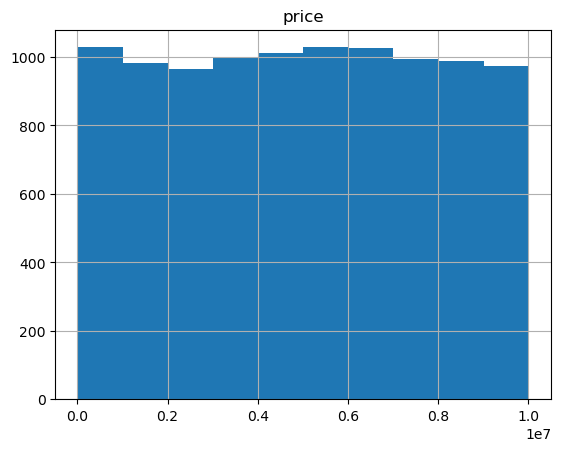

In [10]:
for column in df:
    plt.figure()
    df.hist(column=[column])

In [11]:
y=df['price']
x=df.drop('price',axis=1)


In [12]:
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

feature        vif
0        squareMeters   4.007454
1       numberOfRooms   4.064582
2             hasYard   2.037212
3             hasPool   1.989521
4              floors   4.034013
5            cityCode   4.000543
6       cityPartRange   4.685937
7       numPrevOwners   4.748642
8                made  38.092158
9          isNewBuilt   1.999563
10  hasStormProtector   2.000269
11           basement   4.065724
12              attic   4.022794
13             garage   5.470937
14     hasStorageRoom   2.017443
15       hasGuestRoom   3.480385

In [13]:
try:
    while(vif.max()[1]>5 ):
        m=vif.max()[1]
        m=vif[vif['vif']==m]['feature']
        x=x.drop(m,axis=1)
        vif=pd.DataFrame()
        vif['feature']=x.columns
        vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
except:
    print(vif)

In [14]:
vif.max()

feature    squareMeters
vif            4.869894
dtype: object

In [15]:
x

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  isNewBuilt  hasStormProtector  basement  \
0                 3              8           0                  1      4313   
1                 8              6           1                  0      3653   
2                 6              8           0                  0      2937   
3                10              4           0                  1       659   
4                 3              7           1                  0      8435   
...             ...            ...         ...                ...       ...   
9995              7              6           0                  1      9311   
9996              9              4           0                  1      9061   
9997             10             10           1                  1      8304   
9998              1              3           0                  1      2590   
9999              6             10           1                  0      8485   

      attic  garage  hasStorageRoom  hasGuestRoom  
0      9005     956               0             7  
1      2436     128               1             2  
2      8852     135               1             9  
3      7141     359               0             3  
4      2429     292               1             4  
...     ...     ...             ...           ...  
9995   1698     218               0             4  
9996   1742     230               0             0  
9997   7730     345               1             9  
9998   6174     339               1             4  
9999   2024     278               1             6  

[10000 rows x 15 columns]

In [16]:
X1=x.copy()
X1['intercept']=np.ones([X1.shape[0],1])
results = sm.OLS(y, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.531e+09
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -89669.
No. Observations:               10000   AIC:                         1.794e+05
Df Residuals:                    9984   BIC:                         1.795e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
squareMeters        100.0000      0.001   1.51e+05      0.000      99.999     100.001
numberOfRooms         0.2495      0.660      0.378      0.705      -1.044       1.543
hasYard            3012.2122     37.992     79.286      0.000    2937.741    3086.684
hasPool            2977.0618     37.991     78.362      0.000    2902.591    3051.533
floors               54.5384      0.658     82.937      0.000      53.249      55.827
cityCode             -0.0008      0.001     -1.238      0.216      -0.002       0.000
cityPartRange        47.3133      6.614      7.154      0.000      34.349      60.277
numPrevOwners        -0.4484      6.654     -0.067      0.946     -13.492      12.595
isNewBuilt          158.1204     38.000      4.161      0.000      83.633     232.608
hasStormProtector   141.2198     37.976      3.719      0.000      66.779     215.660
basement             -0.0021      0.007     -0.312      0.755      -0.015       0.011
attic                -0.0046      0.007     -0.703      0.482      -0.017       0.008
garage                0.1130      0.073      1.557      0.119      -0.029       0.255
hasStorageRoom       19.8381     38.022      0.522      0.602     -54.693      94.369
hasGuestRoom         -5.5875      5.984     -0.934      0.350     -17.317       6.143
intercept           289.0244    117.187      2.466      0.014      59.314     518.735
==============================================================================
Omnibus:                       11.884   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.719
Skew:                           0.011   Prob(JB):                      0.00105
Kurtosis:                       3.180   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
display([results.pvalues[i] for i in x])
for i in x:
    if results.pvalues[i]>0.05:
        x=x.drop(i,axis=1)

[0.0,
 0.705313511022238,
 0.0,
 0.0,
 0.0,
 0.21560356692244498,
 9.031040066489877e-13,
 0.946272170638992,
 3.1941258487224394e-05,
 0.0002013801467366877,
 0.7547693920891092,
 0.4823339533228168,
 0.11944400837153314,
 0.6018535890923618,
 0.350467935273839]

In [18]:
pval=[results.pvalues[i] for i in x]
display(max(pval))
display(len(pval)) 

display(pval)

0.0002013801467366877

7

[0.0,
 0.0,
 0.0,
 0.0,
 9.031040066489877e-13,
 3.1941258487224394e-05,
 0.0002013801467366877]

In [19]:
sys=LinearRegression()
sys.fit(x,y)

LinearRegression()

In [20]:
sys.score(x,y) 

0.9999995650903016

In [21]:
sys.coef_

array([ 100.00001528, 3011.69261955, 2977.64232288,   54.56685902,
         47.16641395,  157.36076091,  142.08809345])

In [22]:
pred=pd.Series(sys.predict(x))

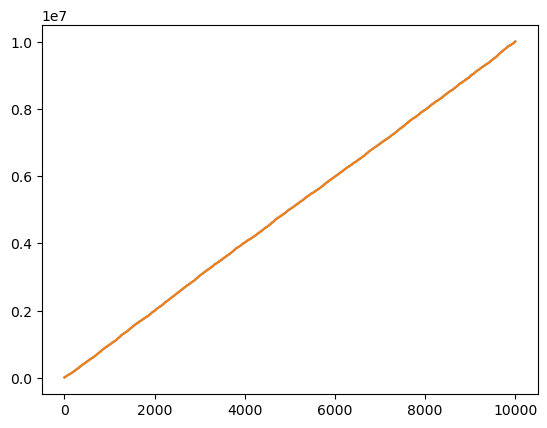

In [23]:
plt.figure()
plt.plot(range(len(y)),y.sort_values())
plt.plot(range(len(y)),pred.sort_values())

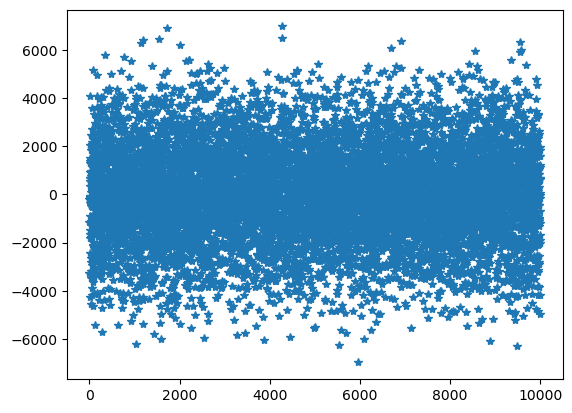

In [24]:
plt.plot(y-pred,'*')
